<a href="https://colab.research.google.com/github/HongTuoiNguyen02/BTVN_Nguyen-Hong-Tuoi_20104071/blob/main/Nhan_dang_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
%cd //content/drive/MyDrive/Colab Notebooks/BTVN/Money/

/content/drive/MyDrive/Colab Notebooks/BTVN/Money


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 297 images belonging to 9 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 90 images belonging to 9 classes.


In [ ]:
train_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

In [ ]:
test_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
10/10 [==============================] - 149s 13s/step - loss: 7.7444 - accuracy: 0.1044 - val_loss: 2.0377 - val_accuracy: 0.2222
Epoch 2/100
10/10 [==============================] - 33s 3s/step - loss: 2.0321 - accuracy: 0.2761 - val_loss: 1.7762 - val_accuracy: 0.3556
Epoch 3/100
10/10 [==============================] - 33s 3s/step - loss: 1.6509 - accuracy: 0.4141 - val_loss: 1.2936 - val_accuracy: 0.4333
Epoch 4/100
10/10 [==============================] - 33s 3s/step - loss: 1.0826 - accuracy: 0.6195 - val_loss: 0.7504 - val_accuracy: 0.7556
Epoch 5/100
10/10 [==============================] - 32s 3s/step - loss: 0.7372 - accuracy: 0.7441 - val_loss: 0.6795 - val_accuracy: 0.8111
Epoch 6/100
10/10 [==============================] - 34s 3s/step - loss: 0.5719 - accuracy: 0.8451 - val_loss: 0.6033 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 33s 3s/step - loss: 0.3977 - accuracy: 0.8721 - val_loss: 0.2856 - val_accuracy: 0.9222
Epoch 8/100

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Nhan_dang_tien.h5')

In [ ]:
model_tien = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Nhan_dang_tien.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01190907508134842
Train Accuracy 0.996632993221283


1/1 [==============================] - 1s 528ms/step
500k


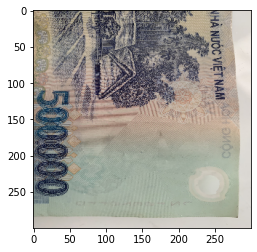

1/1 [==============================] - 0s 18ms/step
500k


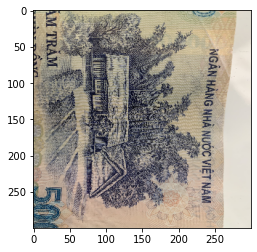

1/1 [==============================] - 0s 17ms/step
500k


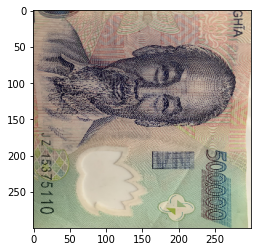

1/1 [==============================] - 0s 16ms/step
500k


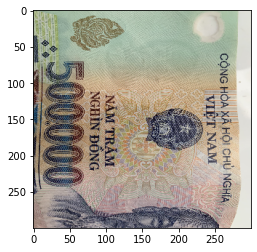

1/1 [==============================] - 0s 15ms/step
500k


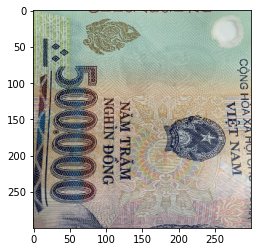

1/1 [==============================] - 0s 17ms/step
200k


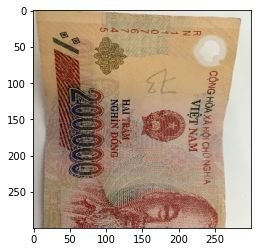

1/1 [==============================] - 0s 17ms/step
200k


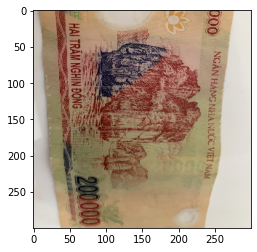

1/1 [==============================] - 0s 15ms/step
200k


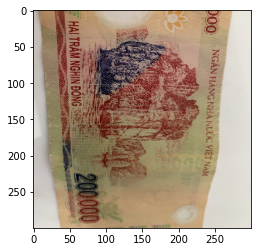

1/1 [==============================] - 0s 16ms/step
200k


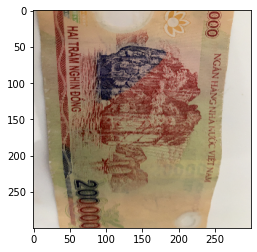

1/1 [==============================] - 0s 15ms/step
200k


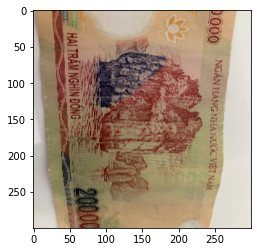

1/1 [==============================] - 0s 18ms/step
100k


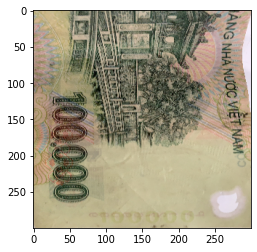

1/1 [==============================] - 0s 15ms/step
100k


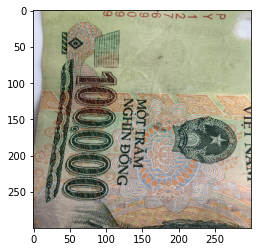

1/1 [==============================] - 0s 16ms/step
100k


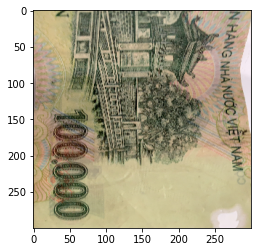

1/1 [==============================] - 0s 16ms/step
100k


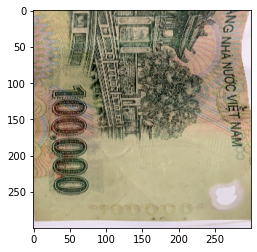

1/1 [==============================] - 0s 16ms/step
100k


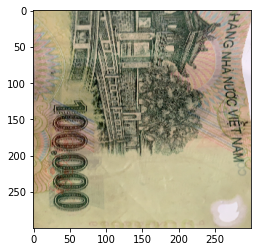

1/1 [==============================] - 0s 18ms/step
5ok


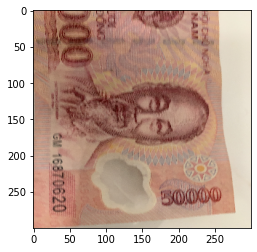

1/1 [==============================] - 0s 18ms/step
5ok


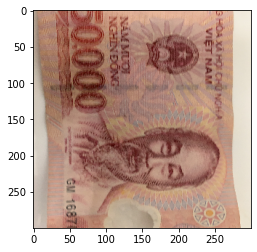

1/1 [==============================] - 0s 15ms/step
5ok


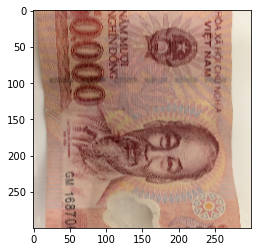

1/1 [==============================] - 0s 15ms/step
5ok


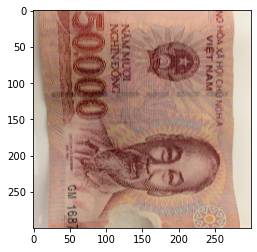

1/1 [==============================] - 0s 16ms/step
5ok


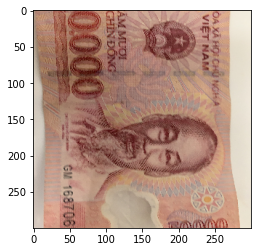

1/1 [==============================] - 0s 17ms/step
20k


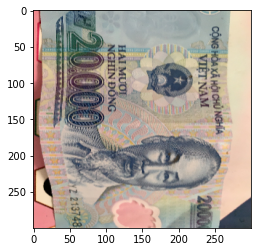

1/1 [==============================] - 0s 16ms/step
20k


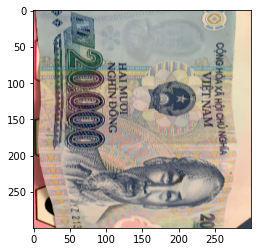

1/1 [==============================] - 0s 16ms/step
20k


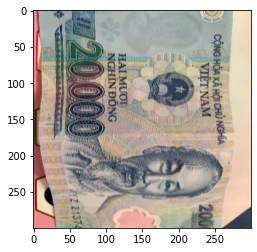

1/1 [==============================] - 0s 16ms/step
20k


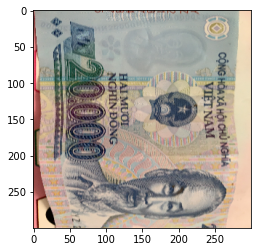

1/1 [==============================] - 0s 16ms/step
20k


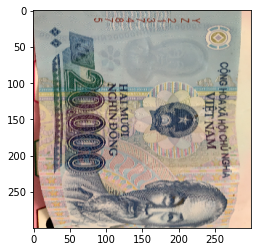

1/1 [==============================] - 0s 16ms/step
10k


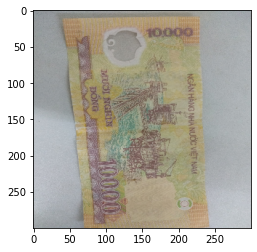

1/1 [==============================] - 0s 17ms/step
10k


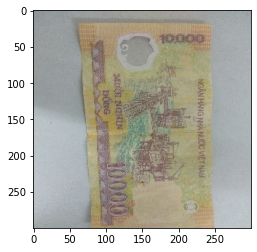

1/1 [==============================] - 0s 15ms/step
10k


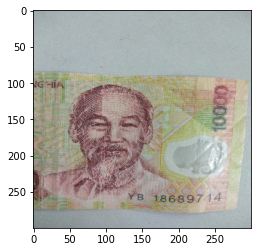

1/1 [==============================] - 0s 18ms/step
10k


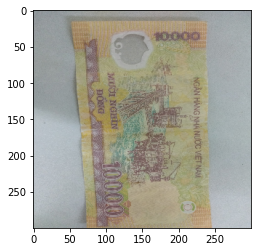

1/1 [==============================] - 0s 15ms/step
10k


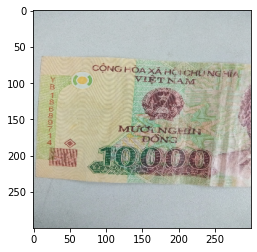

1/1 [==============================] - 0s 18ms/step
10k


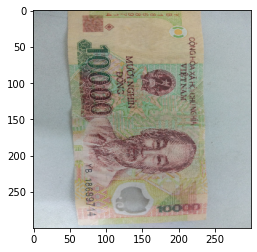

1/1 [==============================] - 0s 16ms/step
10k


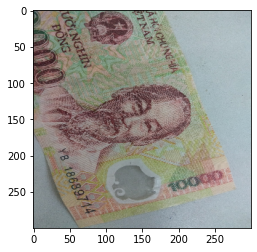

1/1 [==============================] - 0s 15ms/step
10k


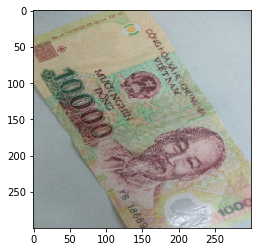

1/1 [==============================] - 0s 16ms/step
10k


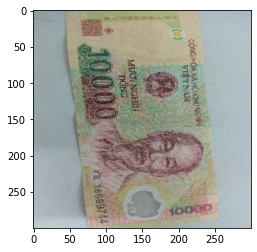

1/1 [==============================] - 0s 22ms/step
10k


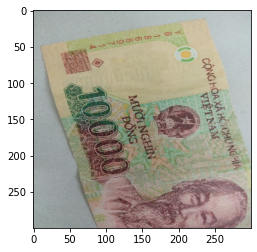

1/1 [==============================] - 0s 15ms/step
5k


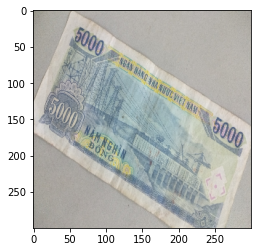

1/1 [==============================] - 0s 16ms/step
5k


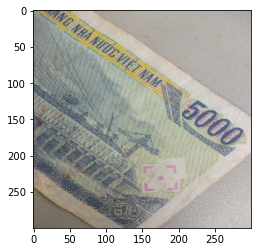

1/1 [==============================] - 0s 16ms/step
5k


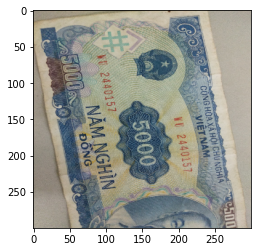

1/1 [==============================] - 0s 17ms/step
5k


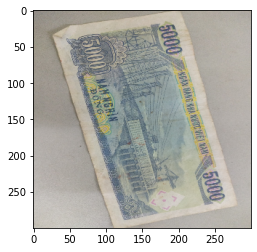

1/1 [==============================] - 0s 17ms/step
5k


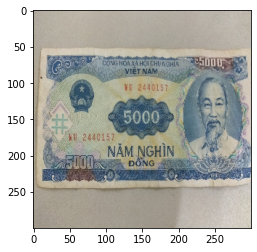

1/1 [==============================] - 0s 16ms/step
2k


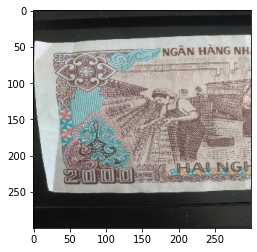

1/1 [==============================] - 0s 20ms/step
2k


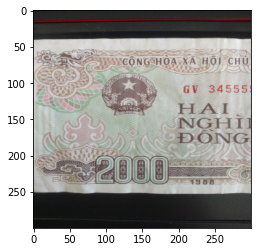

1/1 [==============================] - 0s 15ms/step
2k


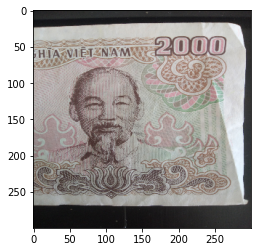

1/1 [==============================] - 0s 23ms/step
2k


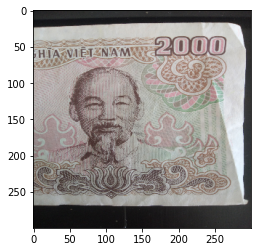

1/1 [==============================] - 0s 18ms/step
2k


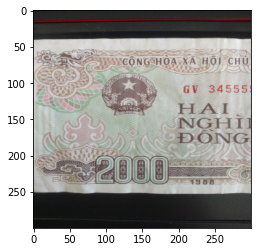

1/1 [==============================] - 0s 16ms/step
1k


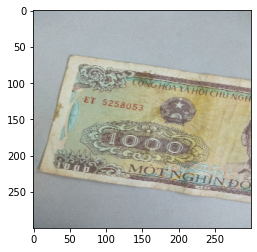

1/1 [==============================] - 0s 16ms/step
1k


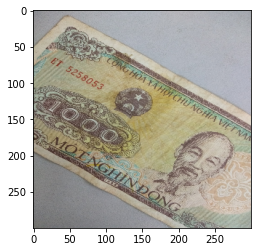

1/1 [==============================] - 0s 16ms/step
1k


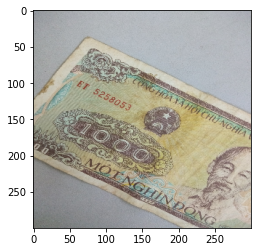

1/1 [==============================] - 0s 15ms/step
1k


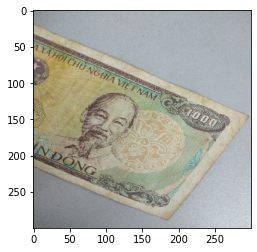

1/1 [==============================] - 0s 25ms/step
1k


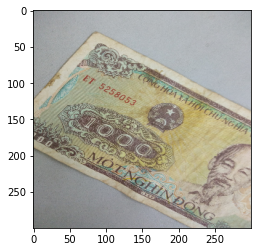

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN/Money/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_tien.predict(img)
  if round(result[0][0])==1:
    prediction='100k'
  if round(result[0][1])==1:
    prediction = '10k'
  if round(result[0][2])==1:
    prediction='1k'
  if round(result[0][3])==1:
    prediction='200k'
  if round(result[0][4])==1:
    prediction='20k'
  if round(result[0][5])==1:
    prediction='2k'
  if round(result[0][6])==1:
    prediction='500k'
  if round(result[0][7])==1:
    prediction='5ok'
  if round(result[0][8])==1:
    prediction='5k'
  print(prediction)
  plt.show()

In [ ]:
#xuất pdf
!jupyter nbconvert --to html "/content/Nhan_dang_tien.ipynb"

[NbConvertApp] Converting notebook /content/Nhan_dang_tien.ipynb to html
[NbConvertApp] Writing 7198898 bytes to /content/Nhan_dang_tien.html
